# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [131]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [132]:
import numpy as np
import math
from scipy import optimize
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
#We define the parameters
m=1
t0=0.4
t1=0.1
k=0.4
w=1
epsilon=0.3
v=10
l = range(0,1)

def ufunc(l,x,v=10,epsilon=0.3):
    return np.log(x)-v*((l**(1+1/epsilon))/(1+1/epsilon))

# a. objective funciton (to minimize)
def value_of_choice(l,x,m,w,t0,t1,k,v,epsilon):
    x = m + w*l-(t0*w*l + t1*max(w*l-k,0))
    return -ufunc(l,x,v,epsilon)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,l,method='bounded',
    bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon))

# c. unpack solution
l = sol_case1.x
x = m + w*l-(t0*w*l + t1*max(w*l-k,0))
u = ufunc(l,x,v=10,epsilon=0.3)

print('solution found')
print(f'Optimal labour supply: {l:.2f}')
print(f'Optimal consumption: {x:.2f}')
print(f'Utility: {u:.2f}')

solution found
Optimal labour supply: 0.40
Optimal consumption: 1.24
Utility: 0.17


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

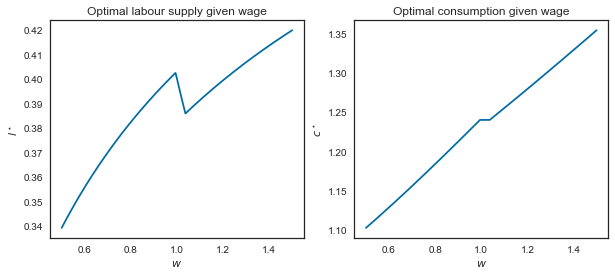

In [152]:
N=1000
w_values = np.linspace(0.5,1.5,N)
l_values = np.empty(N)
x_values = np.empty(N)

def constraint(l,w):
    cons = m + w*l-(t0*w*l + t1*max(w*l-k,0))
    return cons

for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(value_of_choice,bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon),method="bounded")
    l_values[i] = result.x
    x_values[i] = constraint(l_values[i],w)

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,4))

#subplot 1
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_values,l_values)


ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')

#subplot 2
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_values,x_values)


ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')

plt.show

# Question 3

ADD ANSWER.

In [153]:
def tax(w_values,l_values,t0,t1,k):
    revenue = np.sum(t0*w_values*l_values + t1*np.max(w_values*l_values-k,0))
    return revenue

print(f'Total tax revenue: {tax_rev(w_values,l_values,t0,t1,k):.1f}')

Total tax revenue: 180.7


# Question 4

ADD ANSWER.

In [154]:
#We define the new value of elasticity
epsilon2=0.1

#The process from previous questions is repeated
for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(value_of_choice,bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon2),method="bounded")
    l_values[i] = result.x
    x_values[i] = constraint(l_values[i],w)

def tax(w_values,l_values,t0,t1,k):
    revenue = np.sum(t0*w_values*l_values + t1*np.max(w_values*l_values-k,0))
    return revenue

print(f'Total tax revenue for epsilon = 0.1: {tax_rev(w_values,l_values,t0,t1,k):.1f}')

Total tax revenue for epsilon = 0.1: 358.1


# Question 5

ADD ANSWER.

In [155]:
#def tax_opt(x):
    #t0 = x[0]
    #t1 = x[1]
    #k = x[2]
    #w = x[3]
    #l = x[4]
    #rev = np.sum(t0*w*l + t1*np.max(w*l-k,0))
    #return -rev

def objective(x):
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    w = x[3]
    l = x[4]
    rev = np.sum(t0*w*l + t1*np.max(w*l-k,0))
    return rev

def budget_constraint_tax(x):
    tau0 = x[2]
    tau1 = x[3]
    kappa = x[4]
    cons = m + x[0]*x[1] - (x[2]*x[0]*x[1] + x[3]*np.max(x[0]*x[1]-x[4],0))
    return cons

def eq_tax(x):
    w = x[0]
    l = x[1]
    c = budget_constraint_tax(x)
    return objective(x)

# Multivariate optimizer 
x0 = [1, 1, 1, 1, 1]
constraint = ({"type":"ineq","fun":budget_constraint_tax})
bounds = ((0.5,1.5),(0,1),(0,1),(0,1),(0,1))

tax_res = optimize.minimize(eq_tax, x0, bounds=bounds,constraints=constraint, method='SLSQP')

# Unpacking results
w_star = tax_res.x[0]
l_star = tax_res.x[1]
tau_0_star = tax_res.x[2]
tau_1_star = tax_res.x[3]
kappa_star = tax_res.x[4]
c_star = budget_constraint_tax(tax_res.x)
unfunc_opt_tax = ufunc(c_star,l_star)
tax_rev_opt = tax_rev(w_values,l_values,tau_0_star,tau_1_star,kappa_star)

# Results
print(f'Standard labor income is equal to: {tau_0_star:.2f}')
print(f'Top bracket labor income is equal to: {tau_1_star:.2f}')
print(f'Cut-off for top labor income is equal to: {tau_1_star:.2f}')
print(f'The total tax revenue is equal to: {tax_rev_opt:.2f}')

Standard labor income is equal to: 1.00
Top bracket labor income is equal to: 0.00
Cut-off for top labor income is equal to: 0.00
The total tax revenue is equal to: 718.99


# Conclusion

ADD CONCISE CONLUSION.